In [21]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [22]:

# Load the dataset
file_path = r"supermarket_sales - Sheet1.csv"
df = pd.read_csv(file_path, encoding="iso-8859-1")

# Display the first few rows of the dataset to understand its structure
df.head()





,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [23]:
# Group by 'Invoice ID' and filter out groups with a count greater than 1
duplicate_invoices = df.groupby('Invoice ID').filter(lambda x: len(x) > 1)

# Count the number of rows in the filtered DataFrame
count = len(duplicate_invoices)
count

0

In [24]:
duplicate_invoices

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


In [25]:
df=df.drop(columns=["Invoice ID","Unit price","Tax 5%","gross margin percentage"])


In [26]:
df.head()

,Branch,City,Customer type,Gender,Product line,Quantity,Total,Date,Time,Payment,cogs,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,7,548.9715,1/5/2019,13:08,Ewallet,522.83,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,5,80.2200,3/8/2019,10:29,Cash,76.40,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,7,340.5255,3/3/2019,13:23,Credit card,324.31,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,8,489.0480,1/27/2019,20:33,Ewallet,465.76,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,7,634.3785,2/8/2019,10:37,Ewallet,604.17,30.2085,5.3


In [27]:
df['Branch City'] = df['Branch'] + " " + df['City']
df['Branch City'] = df['Branch City'].astype('category')
df['Branch City'] = df['Branch City'].cat.codes

In [28]:
df=df.drop(columns=['Branch','City'])
df

,Customer type,Gender,Product line,Quantity,Total,Date,Time,Payment,cogs,gross income,Rating,Branch City
0,Member,Female,Health and beauty,7,548.9715,1/5/2019,13:08,Ewallet,522.83,26.1415,9.1,0
1,Normal,Female,Electronic accessories,5,80.2200,3/8/2019,10:29,Cash,76.40,3.8200,9.6,2
2,Normal,Male,Home and lifestyle,7,340.5255,3/3/2019,13:23,Credit card,324.31,16.2155,7.4,0
3,Member,Male,Health and beauty,8,489.0480,1/27/2019,20:33,Ewallet,465.76,23.2880,8.4,0
4,Normal,Male,Sports and travel,7,634.3785,2/8/2019,10:37,Ewallet,604.17,30.2085,5.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Normal,Male,Health and beauty,1,42.3675,1/29/2019,13:46,Ewallet,40.35,2.0175,6.2,2
996,Normal,Female,Home and lifestyle,10,1022.4900,3/2/2019,17:16,Ewallet,973.80,48.6900,4.4,1
997,Member,Male,Food and beverages,1,33.4320,2/9/2019,13:22,Cash,31.84,1.5920,7.7,0
998,Normal,Male,Home and lifestyle,1,69.1110,2/22/2019,15:33,Cash,65.82,3.2910,4.1,0


In [29]:
df['Gender']= df['Gender'].astype('category')
df['Gender'] = df['Gender'].cat.codes
df

,Customer type,Gender,Product line,Quantity,Total,Date,Time,Payment,cogs,gross income,Rating,Branch City
0,Member,0,Health and beauty,7,548.9715,1/5/2019,13:08,Ewallet,522.83,26.1415,9.1,0
1,Normal,0,Electronic accessories,5,80.2200,3/8/2019,10:29,Cash,76.40,3.8200,9.6,2
2,Normal,1,Home and lifestyle,7,340.5255,3/3/2019,13:23,Credit card,324.31,16.2155,7.4,0
3,Member,1,Health and beauty,8,489.0480,1/27/2019,20:33,Ewallet,465.76,23.2880,8.4,0
4,Normal,1,Sports and travel,7,634.3785,2/8/2019,10:37,Ewallet,604.17,30.2085,5.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Normal,1,Health and beauty,1,42.3675,1/29/2019,13:46,Ewallet,40.35,2.0175,6.2,2
996,Normal,0,Home and lifestyle,10,1022.4900,3/2/2019,17:16,Ewallet,973.80,48.6900,4.4,1
997,Member,1,Food and beverages,1,33.4320,2/9/2019,13:22,Cash,31.84,1.5920,7.7,0
998,Normal,1,Home and lifestyle,1,69.1110,2/22/2019,15:33,Cash,65.82,3.2910,4.1,0


In [30]:

df['Customer type']= df['Customer type'].astype('category')
df['Customer type'] = df['Customer type'].cat.codes
df['Payment']= df['Payment'].astype('category')
df['Payment'] = df['Payment'].cat.codes
df['Product line']= df['Product line'].astype('category')
df['Product line'] = df['Product line'].cat.codes
df

,Customer type,Gender,Product line,Quantity,Total,Date,Time,Payment,cogs,gross income,Rating,Branch City
0,0,0,3,7,548.9715,1/5/2019,13:08,2,522.83,26.1415,9.1,0
1,1,0,0,5,80.2200,3/8/2019,10:29,0,76.40,3.8200,9.6,2
2,1,1,4,7,340.5255,3/3/2019,13:23,1,324.31,16.2155,7.4,0
3,0,1,3,8,489.0480,1/27/2019,20:33,2,465.76,23.2880,8.4,0
4,1,1,5,7,634.3785,2/8/2019,10:37,2,604.17,30.2085,5.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,3,1,42.3675,1/29/2019,13:46,2,40.35,2.0175,6.2,2
996,1,0,4,10,1022.4900,3/2/2019,17:16,2,973.80,48.6900,4.4,1
997,0,1,2,1,33.4320,2/9/2019,13:22,0,31.84,1.5920,7.7,0
998,1,1,4,1,69.1110,2/22/2019,15:33,0,65.82,3.2910,4.1,0


In [31]:
df.fillna({
    'Quantity': df['Quantity'].mean(),
    'Total': df['Total'].mean(),
    'cogs': df['cogs'].mean(),
    'Rating': df['Rating'].mean(),
    # 'gross income': df['gross income'].mean()
}, inplace=True)

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['Quantity', 'Total', 'cogs', 'Rating']  # Add other numerical columns if needed
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df

,Customer type,Gender,Product line,Quantity,Total,Date,Time,Payment,cogs,gross income,Rating,Branch City
0,0,0,3,0.509930,548.9715,1/5/2019,13:08,2,0.919607,0.919607,1.238443,0
1,1,0,0,-0.174540,80.2200,3/8/2019,10:29,0,-0.987730,-0.987730,1.529527,2
2,1,1,4,0.509930,340.5255,3/3/2019,13:23,1,0.071446,0.071446,0.248760,0
3,0,1,3,0.852165,489.0480,1/27/2019,20:33,2,0.675780,0.675780,0.830927,0
4,1,1,5,0.509930,634.3785,2/8/2019,10:37,2,1.267125,1.267125,-0.973790,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,3,-1.543480,42.3675,1/29/2019,13:46,2,-1.141750,-1.141750,-0.449840,2
996,1,0,4,1.536635,1022.4900,3/2/2019,17:16,2,2.846340,2.846340,-1.497741,1
997,0,1,2,-1.543480,33.4320,2/9/2019,13:22,0,-1.178109,-1.178109,0.423410,0
998,1,1,4,-1.543480,69.1110,2/22/2019,15:33,0,-1.032932,-1.032932,-1.672391,0


In [33]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time

# Sort the DataFrame by "Date" and then by "Time"
df.sort_values(by=['Date', 'Time'], inplace=True)

# Reset the index if needed
df.reset_index(drop=True, inplace=True)

# Display the sorted DataFrame
print(df)

     Customer type  Gender  Product line  Quantity    Total       Date  \
0                1       1             5  0.167695  457.443 2019-01-01   
1                0       0             2  1.536635  888.615 2019-01-01   
2                0       0             5  0.167695  184.086 2019-01-01   
3                1       1             3 -1.201245  132.027 2019-01-01   
4                1       0             1  1.194400  621.243 2019-01-01   
..             ...     ...           ...       ...      ...        ...   
995              0       1             2 -1.201245  196.140 2019-03-30   
996              0       0             0 -0.174540  338.310 2019-03-30   
997              0       1             3  0.852165  609.588 2019-03-30   
998              0       0             2  0.852165  609.168 2019-03-30   
999              0       1             0 -0.859010  304.983 2019-03-30   

         Time  Payment      cogs  gross income    Rating  Branch City  
0    10:39:00        1  0.547180      0

In [34]:
df['Date'] = pd.to_datetime(df['Date'])

# Convert dates to numeric values (number of days since January 1, 1970)
df['day'] = df['Date'].sub(pd.Timestamp('1970-01-01')).dt.days
df

,Customer type,Gender,Product line,Quantity,Total,Date,Time,Payment,cogs,gross income,Rating,Branch City,day
0,1,1,5,0.167695,457.443,2019-01-01,10:39:00,1,0.547180,0.547180,-0.042324,0,17897
1,0,0,2,1.536635,888.615,2019-01-01,11:36:00,1,2.301607,2.301607,1.180227,1,17897
2,0,0,5,0.167695,184.086,2019-01-01,11:40:00,2,-0.565102,-0.565102,-1.148440,2,17897
3,1,1,3,-1.201245,132.027,2019-01-01,11:43:00,0,-0.776928,-0.776928,-1.148440,2,17897
4,1,0,1,1.194400,621.243,2019-01-01,13:55:00,0,1.213678,1.213678,0.423410,0,17897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,2,-1.201245,196.140,2019-03-30,16:34:00,0,-0.516054,-0.516054,-0.857357,1,17985
996,0,0,0,-0.174540,338.310,2019-03-30,17:04:00,0,0.062431,0.062431,-0.216974,0,17985
997,0,1,3,0.852165,609.588,2019-03-30,17:58:00,0,1.166254,1.166254,-1.381307,1,17985
998,0,0,2,0.852165,609.168,2019-03-30,19:26:00,1,1.164545,1.164545,-1.730607,2,17985


In [35]:
# X = df.drop(columns=["gross income","Date","Time"]).values
X =  df['day'].values
y =  df[["gross income"]].values

In [36]:
# noise_list = ["is", "a", "this", "..."]

# def _remove_noise(input_text):
#     words = input_text.split()
#     noise_free_words = [word for word in words if word not in noise_list]
#     noise_free_text = " ".join(noise_free_words)
#     return noise_free_text


In [37]:
# import numpy as np
import matplotlib.pyplot as plt
import sklearn   # This imports the scikit-learn library
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# rng = np.random.RandomState(1)

arrX = X
arrY = y


In [38]:
model=LinearRegression(fit_intercept=True)


ValueError: x and y must have same first dimension, but have shapes (2, 1000) and (2000, 1)

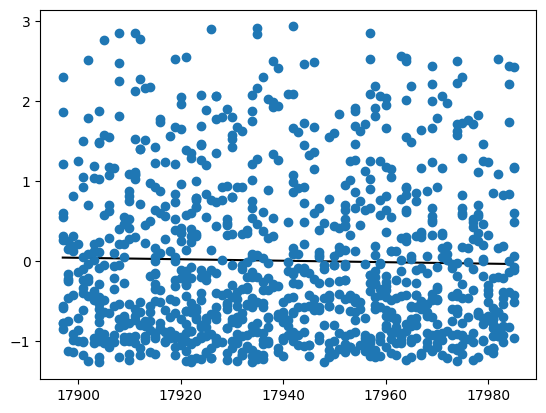

In [39]:


# Creating the Linear Regression model
model = LinearRegression(fit_intercept=True)
model.fit(arrX[:, np.newaxis], arrY)

# Preparing data for prediction and plotting
xfit = np.linspace(arrX.min(), arrX.max(), 1000)
yfit = model.predict(xfit[:, np.newaxis])

# Plotting the data and the regression line
plt.plot(xfit, yfit, color="black")
plt.plot(arrX, arrY, 'o')
plt.plot(np.vstack([arrX, arrX]), np.vstack([arrY, model.predict(arrX[:, np.newaxis])]), color="red")

# Outputting the parameters
print("Parameters:", model.coef_, model.intercept_)
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)

# Calculating and printing the Mean Squared Error
mse = mean_squared_error(arrY, model.predict(arrX[:, np.newaxis]))
print("Mean Squared Error:", mse)

plt.xlabel("Quantity")
plt.ylabel("Total")
plt.title("Linear Regression on Supermarket Sales Data")
plt.show()

In [40]:
# Removing Stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
amazon_df['review_content'] = amazon_df['review_content']\
            .apply(lambda x: " ".join(x for x in x.split() if x not in stop))
amazon_df['review_content'].head()

NameError: name 'amazon_df' is not defined

In [ ]:
# Word Tokenization
from nltk.tokenize import word_tokenize

print(amazon_df['review_content'].iloc[0])
tokens = word_tokenize(amazon_df['review_content'].iloc[0])
print(tokens)

In [ ]:
# Frequency Distribution
from nltk.probability import FreqDist

fdist = FreqDist(tokens)
fdist.most_common(2)

In [ ]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30, cumulative=False)
plt.show()

In [ ]:
# Stemming
from nltk.stem import PorterStemmer

st = PorterStemmer()
amazon_df['review_content'][:5].apply(lambda x: " "\
                            .join([st.stem(word) for word in x.split()]))

In [ ]:
# Lemmatization
from nltk.stem.wordnet import WordNetLemmatizer

lem = WordNetLemmatizer()
amazon_df['review_content'][:5].apply(lambda x: " "\
                            .join([lem.lemmatize(word, "v") \
                                for word in x.split()]))

In [ ]:
amazon_df['review_content'][:5].apply(lambda x: " "\
                            .join([lem.lemmatize(word, "n") \
                                for word in x.split()]))

In [ ]:
# Object Standardization
lookup_dict = {'rt':'Retweet', 'dm':'direct message', \
               'awsm':'awesome', 'luv':'love'}

def _lookup_words(input_text):
    words = input_text.split()
    new_words = []
    for word in words:
        if word.lower() in lookup_dict:
            word = lookup_dict[word.lower()]

        new_words.append(word)
        new_text = " ".join(new_words)

    return new_text



In [ ]:
from nltk import word_tokenize, pos_tag

# Function to apply POS tagging
def pos_tagging(text):
    tokens = word_tokenize(text)
    return pos_tag(tokens)

# Apply POS tagging to the review_content column
amazon_df['pos_tags'] = amazon_df['review_content'].apply(pos_tagging)


In [ ]:
from textblob import TextBlob

# Function to generate N-grams
def generate_ngrams(text, n=3):
    blob = TextBlob(text)
    return blob.ngrams(n)

# Apply N-grams function to the review_content column
amazon_df['ngrams'] = amazon_df['review_content'].apply(generate_ngrams)


In [ ]:
## Statistical Features
# Term frequency (TF)
tf1 = (amazon_df['review_content'][1:2]).apply(lambda x: \
                    pd.value_counts(x.split(" ")))\
                    .sum(axis = 0).reset_index()
tf1.columns = ['words', 'tf']
tf1.head()

In [ ]:
# Inverse Document Frequency (IDF)
for i,word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(amazon_df.shape[0]/\
                        (len(amazon_df[amazon_df['review_content']\
                        .str.contains(word)])))

tf1.head()

In [ ]:
# TF-IDF
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1.head()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
                                   stop_words='english')

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(amazon_df['review_content'])
print(tfidf_matrix)



In [ ]:
# Function to apply TextBlob sentiment analysis
def get_textblob_sentiment(text):
    return TextBlob(text).sentiment


amazon_df['textblob_sentiment'] = amazon_df['review_content'].apply(get_textblob_sentiment)
print(amazon_df['textblob_sentiment'] )

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer


# download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to apply sentiment analysis
def get_sentiment(text):
    # Ensure text is a string
    text = str(text)
    return sia.polarity_scores(text)['compound']

# Apply the sentiment analysis function to the text data column
# Replace 'review_content' with your actual text data column name
amazon_df['sentiment'] = amazon_df['review_content'].apply(get_sentiment)

# Display the first few rows of the dataset with sentiment scores
amazon_df[['review_content', 'sentiment']].head()


In [ ]:
import pandas as pd
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier

def word_feats(words):
    return dict([(word, True) for word in words])

# Load positive vocabulary from an Excel file
positive_vocab = pd.read_excel('positive_words.xlsx')
# Assuming the words are in the first column, convert them to a list
positive_vocab = positive_vocab[positive_vocab.columns[0]].tolist()

negative_vocab = ['bad', 'terrible', 'useless', 'hate', ':(']
neutral_vocab = ['movie', 'the', 'sound', 'was', 'is', 'actors', 'did', 'know', 'words', 'not']

positive_features = [(word_feats([pos]), 'pos') for pos in positive_vocab]
negative_features = [(word_feats([neg]), 'neg') for neg in negative_vocab]
neutral_features = [(word_feats([neu]), 'neu') for neu in neutral_vocab]

train_set = negative_features + positive_features + neutral_features

classifier = NaiveBayesClassifier.train(train_set)

# Predict
neg = 0
pos = 0
sentence = "Awesome movie, I liked it"
sentence = sentence.lower()
words = sentence.split(' ')

for word in words:
    classResult = classifier.classify(word_feats([word]))
    if classResult == 'neg':
        neg = neg + 1
    if classResult == 'pos':
        pos = pos + 1

print('Positive: ' + str(float(pos)/len(words)))
print('Negative: ' + str(float(neg)/len(words)))


In [ ]:
from textblob.classifiers import NaiveBayesClassifier as NBC
from textblob import TextBlob

# Training and test data
training_corpus = [('Till now satisfied with the quality', 'pos'), ('good product', 'pos'), ('good product', 'pos'),('Not quite durable and sturdy','neg'),('nice product','pos'),('But packaging is not good feeling like seller gave','neg')]

# Train Naive Bayes Classifier
model = NBC(training_corpus)

# Function to classify new text
def classify_text(text):
    return model.classify(text)

# Apply to  DataFrame
amazon_df['textblob_classification'] = amazon_df['review_content'].apply(classify_text)
amazon_df['textblob_classification']
amazon_df.to_csv('test.csv')